# The Black-Scholes Option Pricing Model

Considered to be the forefather of mathematical finance, the French mathematician Louis Jean-Baptiste Alphonse Bachelier (March 11, 1870 – April 28, 1946) introduced in his doctoral thesis for the first time a mathematical model of Brownian motion and its use for valuing stock options paving the way for the formulation of the Nobel Prize-winning solution to the option pricing problem by Fischer Black, Myron Scholes, and Robert Merton in 1973, the first decisive advance since 1900, and for a multibillion-dollar global industry to emerge.

![](https://upload.wikimedia.org/wikipedia/commons/3/3b/LouisBachelier.jpg)

## Option Definition

In finance, an **option** is a contract which gives the buyer the right, but not the obligation, to buy or sell an underlying asset or instrument at a specified **strike price**, $K$, prior to or on a specified date, depending on the form of the option. The strike price may be set by reference to the **spot price**, $S_t$, of the underlying security or commodity on the day an option is taken out, or it may be fixed at a **discount** or at a **premium**. The seller has the corresponding obligation to fulfill the transaction, to sell or buy, if the buyer "exercises" the option [**[1]**](https://en.wikipedia.org/wiki/Option). 

## Option Types

There are many different types of options that can be traded and these can be categorized in a number of ways. In a very broad sense, there are two main types: calls and puts. 
<br>
The table below provides a formal definition of the two option types.

|**Call Option**|**Put Option**|
|---------------|--------------|
|A **call option** is a financial contract between two parties, the buyer and the seller of this type of option. The buyer of the call option has the right, but not the obligation, to buy an agreed quantity of a particular commodity or financial instrument from the seller of the option at a certain time for a certain price. The seller is obligated to sell the commodity or financial instrument to the buyer if the buyer so decides. The buyer pays a fee for this right [**[2]**](https://en.wikipedia.org/wiki/Call_option).|A **put option** is a stock market device which gives the owner the right, but not the obligation, to sell an asset, at a specified price, by a predetermined date to a given party [**[3]**](https://en.wikipedia.org/wiki/Put_option).|

At time of maturity $T$, the payoff $C_T$ of a call option defined by a strike or exercise price $K$ is mathematically expressed as,

\begin{equation} \label{eq1}
\begin{split}
\left.
\begin{aligned}
   S_T - K \space \space \textrm{if} \space \space S_T \geq K \\
   0       \space \space \textrm{if} \space \space S_T \leq K
\end{aligned}
\right\} &= \textrm{max}\{S_T - K, 0\} = \left(S_T - K\right)^+
\end{split}
\end{equation} 

likewise, the payoff $P_{T}$ of a put option defined by a strike price $K$ is mathematically expressed as,

\begin{equation} \label{eq2}
\begin{split}
\left.
\begin{aligned}
   K - S_T \space \space \textrm{if} \space \space K \geq S_T \\
   0       \space \space \textrm{if} \space \space K \leq S_T
\end{aligned}
\right\} &= \textrm{max}\{K - S_T, 0\} = \left(K - S_T\right)^+
\end{split}
\end{equation} 

where $S_T$, in both cases, is the spot price of the underlying at time of maturity.

## Option Styles

In finance, the **style** of an option is the class into which the option falls, usually defined by the dates on which the option may be exercised. The vast majority of options are either **European** or **American** options. These options, as well as others where the payoff is calculated similarly, are referred to as "vanilla options." Options where the payoff is calculated differently are categorized as "exotic options." Exotic options can pose challenging problems in valuation and hedging [**[4]**](https://en.wikipedia.org/wiki/Option_style). 
<br>
Similarly, the table below provides a formal definition of the two option styles.

|**European Option**|**American Option**|
|---------------|--------------|
|A **European option** is a version of an options contract that limits execution to its expiration date. In other words, if the underlying security such as a stock has moved in price an investor would not be able to exercise the option early and take delivery of or sell the shares. Instead, the call or put action will only take place on the date of option maturity [**[5]**](https://www.investopedia.com/terms/e/europeanoption.asp).|An **American option** is a version of an options contract that allows holders to exercise the option rights at any time before and including the day of expiration [**[6]**](https://www.investopedia.com/terms/a/americanoption.asp).|

## Payoff Diagrams

A **Payoff diagram** is a graphical representation of the potential outcomes of a strategy. Results may be depicted at any point in time, although the graph usually depicts the results at expiration of the options involved in the strategy.
<br>
There are, in general, four main strategies of options investment.

### Long Call

A trader who expects a stock's price to increase can buy a call option to purchase the stock at a fixed price at a later date, rather than purchase the stock outright. The cash outlay on the option is the premium. The trader would have no obligation to buy the stock, but only has the right to do so at or before the expiration date. The risk of loss would be limited to the premium paid, unlike the possible loss had the stock been bought outright.

The holder of an American-style call option can sell his option holding at any time until the expiration date, and would consider doing so when the stock's spot price is above the exercise price, especially if he expects the price of the option to drop. By selling the option early in that situation, the trader can realise an immediate profit.

If the stock price at expiration is lower than the exercise price, the holder of the options at that time will let the call contract expire and only lose the premium [**[7]**](https://en.wikipedia.org/wiki/Option). 

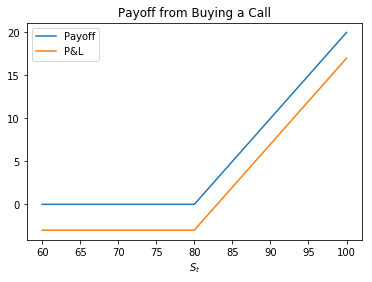

In [1]:
# Scientific libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Call option parameters
S_t = np.linspace(60, 100, 1000)
K = 80
premium = 3

# Call payoff
def CallPayoff(S_t, K):
       return np.where(S_t > K, S_t - K, 0)
    
LongCallPayoff = CallPayoff(S_t, K)

# Call P&L
def CallPandL(S_t, K):
       return np.where(S_t > K, S_t - K, 0) - premium
    
LongCallPandL = CallPandL(S_t, K)

# Visualization
plt.plot(S_t, LongCallPayoff, label='Payoff')
plt.plot(S_t, LongCallPandL, label='P&L')
plt.xlabel(r'$S_t$')
plt.title('Payoff from Buying a Call')
plt.legend()
plt.show()

### Long Put

A trader who expects a stock's price to decrease can buy a put option to sell the stock at a fixed price at a later date. The trader will be under no obligation to sell the stock, but only has the right to do so at or before the expiration date. If the stock price at expiration is below the exercise price by more than the premium paid, he will make a profit. If the stock price at expiration is above the exercise price, he will let the put contract expire and only lose the premium paid [**[8]**](https://en.wikipedia.org/wiki/Option). 

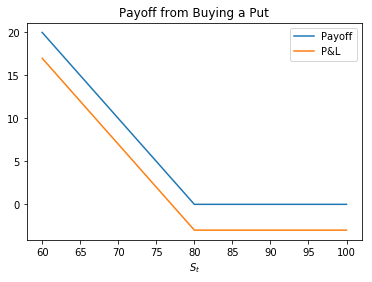

In [2]:
# Put option parameters
S_t = np.linspace(60, 100, 1000)
K = 80
premium = 3

# Put payoff
def PutPayoff(S_t, K):
       return np.where(S_t < K, K - S_t, 0)
    
LongPutPayoff = PutPayoff(S_t, K)

# Put P&L
def PutPandL(S_t, K):
       return np.where(S_t < K, K - S_t, 0) - premium
    
LongPutPandL = PutPandL(S_t, K)

# Visualization
plt.plot(S_t, LongPutPayoff, label='Payoff')
plt.plot(S_t, LongPutPandL, label='P&L')
plt.xlabel(r'$S_t$')
plt.title('Payoff from Buying a Put')
plt.legend()
plt.show()

### Short Call

A trader who expects a stock's price to decrease can sell the stock short or instead sell a call. The trader selling a call has an obligation to sell the stock to the call buyer at a fixed price. If the seller does not own the stock when the option is exercised, he is obligated to purchase the stock from the market at the then market price. If the stock price decreases, the seller of the call will make a profit in the amount of the premium. If the stock price increases over the strike price by more than the amount of the premium, the seller will lose money, with the potential loss being unlimited [**[9]**](https://en.wikipedia.org/wiki/Option). 

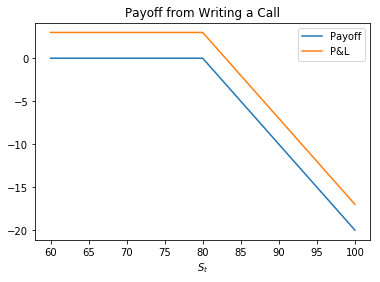

In [3]:
S_t = np.linspace(60, 100, 1000)
K = 80
premium = 3

def CallPayoff(S_t, K):
       return np.where(S_t > K, S_t - K, 0)
    
ShortCallPayoff = -CallPayoff(S_t, K)

def CallPandL(S_t, K):
       return premium - np.where(S_t > K, S_t - K, 0)
    
ShortCallPandL = CallPandL(S_t, K)

plt.plot(S_t, ShortCallPayoff, label='Payoff')
plt.plot(S_t, ShortCallPandL, label='P&L')
plt.xlabel(r'$S_t$')
plt.title('Payoff from Writing a Call')
plt.legend()
plt.show()

### Short Put

A trader who expects a stock's price to increase can buy the stock or instead sell a put. The trader selling a put has an obligation to buy the stock from the put buyer at a fixed price. If the stock price at expiration is above the strike price, the seller of the put will make a profit in the amount of the premium. If the stock price at expiration is below the strike price by more than the amount of the premium, the trader will lose money, with the potential loss being up to the strike price minus the premium [**[10]**](https://en.wikipedia.org/wiki/Option). 

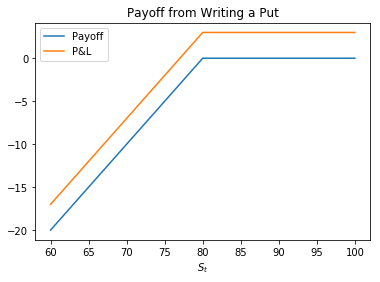

In [4]:
S_t = np.linspace(60, 100, 1000)
K = 80
premium = 3

def PutPayoff(S_t, K):
       return np.where(S_t < K, K - S_t, 0)
    
ShortPutPayoff = -PutPayoff(S_t, K)

def PutPandL(S_t, K):
       return premium - np.where(S_t < K, K - S_t, 0)
    
ShortPutPandL = PutPandL(S_t, K)

plt.plot(S_t, ShortPutPayoff, label='Payoff')
plt.plot(S_t, ShortPutPandL, label='P&L')
plt.xlabel(r'$S_t$')
plt.title('Payoff from Writing a Put')
plt.legend()
plt.show()

## Determinants of Option Value

The value of an option is determined by six variables relating to the underlying asset and financial markets, the table below is a summary of the variables affecting call and put option prices.

|**Factor**|**Call Value**|**Put Value**|
|---------------|--------------|--------------|
|Underlying Asset's Value $\nearrow$               |$\nearrow$              |$\searrow$              |
|Variance of Underlying Asset   $\nearrow$             |$\nearrow$              |$\nearrow$                |
|Strike Price     $\nearrow$          |$\searrow$              |$\nearrow$                |
|Paid Dividends     $\nearrow$           |$\searrow$              |$\nearrow$                |
|Time to Expiration  $\nearrow$              |$\nearrow$              |$\nearrow$                |
|Interest Rate      $\nearrow$          |$\nearrow$              |$\searrow$              |

## Black–Scholes Model

The **Black–Scholes model** is a mathematical model for the dynamics of a financial market containing derivative investment instruments. From the partial differential equation in the model, known as the **Black–Scholes equation**, one can deduce the **Black–Scholes formula**, which gives a theoretical estimate of the price of European-style options and shows that the option has a unique price regardless of the risk of the security and its expected return [**[11]**](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model).

### Assumptions of the Black-Scholes Model

**European style options:** The Black-Scholes model assumes European-style options which can only be exercised upon expiration.
<br>
**Interest rates remain constant:** The interest rates are known and constant.
<br>
**Absence of transaction costs:** There are no transaction costs in buying the option.
<br>
**Constant volatility:** The stock's voltality is constant over time.
<br>
**Normality of returns:** The Black-Scholes model assumes that returns on the underlying stock are normally distributed, $f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\mathrm{e}^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$.

<div class="alert alert-warning">
Tesla stocks (TSLA) as a case study.
</div>

In [5]:
import pandas as pd

# Telsa's historical data
TSLA = pd.read_csv("TSLA.csv")

TSLA["Close"].head()

0    356.410004
1    347.640015
2    338.690002
3    335.450012
4    305.500000
Name: Close, dtype: float64

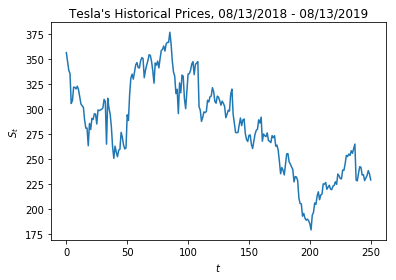

In [6]:
plt.plot(TSLA["Close"])
plt.xlabel(r'$t$')
plt.ylabel(r'$S_t$')
plt.title("Tesla's Historical Prices, 08/13/2018 - 08/13/2019")
plt.show()

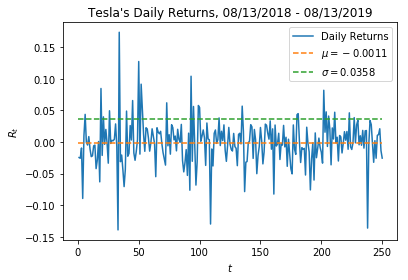

In [7]:
TSLA_Daily_Returns = TSLA['Close'].pct_change()

# Tesla returns parameters
mu = np.repeat([np.mean(TSLA_Daily_Returns)], len(TSLA_Daily_Returns))
sigma = np.repeat([np.std(TSLA_Daily_Returns)], len(TSLA_Daily_Returns))

plt.plot(TSLA_Daily_Returns, label = "Daily Returns")
plt.plot(mu, label = r"$\mu = -0.0011$", linestyle="--")
plt.plot(sigma, label = r"$\sigma = 0.0358$", linestyle="--")
plt.xlabel(r'$t$')
plt.ylabel(r'$R_t$')
plt.title("Tesla's Daily Returns, 08/13/2018 - 08/13/2019")
plt.legend()
plt.show()

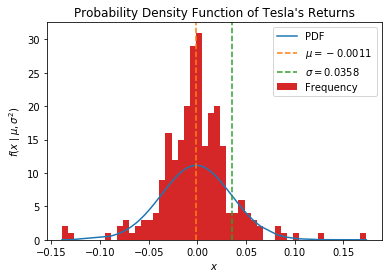

In [8]:
# Normal distribution
def NormalDistribution(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

# Parameters
x = np.sort(TSLA_Daily_Returns)
mu = -0.0011
sigma = 0.0358

plt.plot(x, NormalDistribution(x, mu, sigma), label =r'PDF')
np.warnings.filterwarnings('ignore')
plt.axvline(mu, linestyle='--', color='C1', label = r'$\mu = -0.0011$')
plt.axvline(sigma, linestyle='--', color='C2', label = r'$\sigma = 0.0358$')
plt.hist(x, bins=50, label = r'Frequency', color='C3')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x\mid \mu ,\sigma ^{2})$')
plt.title("Probability Density Function of Tesla's Returns")
plt.legend()
plt.show()

**Random walk, $S_n = S_0 + \sum_{k = 1}^{n} X_k$:** The instantaneous log return of stock price is an infinitesimal random walk with drift; more precisely, 

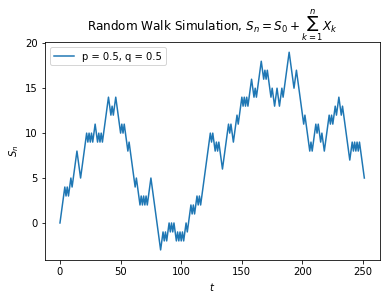

In [9]:
np.random.seed(0)

# Parameters
p = 0.5
q = 0.5

X_0 = 0
S_0 = [X_0]

# Random walk
X_k = np.random.choice(2*np.arange(0, 2)-1, size = 251, p=[0.5, 0.5])
S_n = np.concatenate([S_0, np.cumsum(X_k)])

plt.plot(S_n, label = 'p = 0.5, q = 0.5')
plt.xlabel(r'$t$')
plt.ylabel(r'$S_n$')
plt.title(r'Random Walk Simulation, $S_n = S_0 + \sum_{k = 1}^{n} X_k$', y=1.027)
plt.legend()
plt.show()

it is a **geometric Brownian motion**, $S_t = S_0 \mathrm{e}^{\left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma W_t}$, in which the drift and volatility are assumed constant.

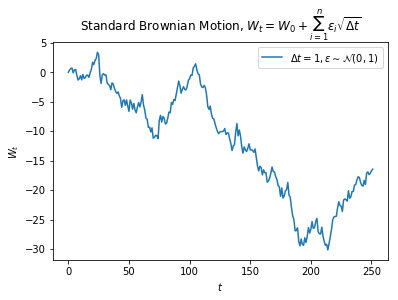

In [10]:
# Wiener process (also known as standard Brownian motion)
def WienerProcess(epsilon, Deltat):
    return np.cumsum(epsilon*np.sqrt(Deltat))

# Parameters
epsilon = np.random.normal(0, 1, 251)
Deltat = 1
W_0 = [0]

W_t = np.concatenate([W_0, WienerProcess(epsilon, Deltat)])

plt.plot(np.arange(252), W_t, label=r'$\Delta{t} = 1, \epsilon \sim {\mathcal {N}}(0,1)}$')
plt.xlabel(r'$t$')
plt.ylabel(r'$W_t$')
plt.title(r'Standard Brownian Motion, $W_t = W_0 + \sum_{i = 1}^n \epsilon_i \sqrt{\Delta t}$', y=1.027)
plt.legend()
plt.show()

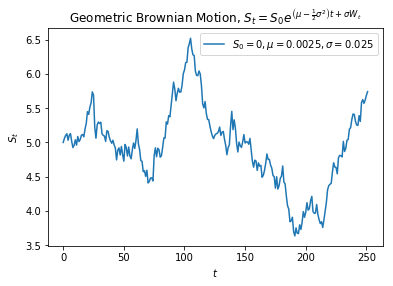

In [11]:
# Geometric Brownian motion
def GeometricBrownianMotion(S_0, mu, sigma, t):
    return S_0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W_t)

# Parameters
S_0 = 5
mu = 0.0025
sigma = 0.025
t = np.arange(252)

plt.plot(t, GeometricBrownianMotion(S_0, mu, sigma, t), label=r'$S_0 = 0, \mu = 0.0025, \sigma = 0.025$')
plt.xlabel(r'$t$')
plt.ylabel(r'$S_t$')
plt.title(r'Geometric Brownian Motion, $S_t = S_0 e^{\left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma W_t}$')
plt.legend()
plt.show()

**Liquidity:** The Black-Scholes model assumes that markets are perfectly liquid.
<br>
**No dividends:** The stock pays no dividends.

### Black-Scholes Equation

The **Black–Scholes equation** is a **partial differential equation**, which describes the price of the option over time. The equation is,

$${\frac {\partial V}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}V}{\partial S^{2}}}+rS{\frac {\partial V}{\partial S}}-rV=0$$

where,

- $V\left(S, t\right)$: The price of the option as a function of the underlying asset $S$, at time $t$.
<br><br>
- $t$: A time in years; we generally use: now = $0$, expiry = $T$.
<br><br>
- $\sigma$: The standard deviation, or volatility, of the stock's returns.
<br><br>
- $S(t)$: The price of the underlying asset at time $t$.
<br><br>
- $r$: The annualized risk-free interest rate, continuously compounded.

### The Black-Scholes Formula

The **Black–Scholes formula** calculates the price of European put and call options. This price is consistent with the Black–Scholes equation as above; this follows since the formula can be obtained by solving the equation for the corresponding terminal and boundary conditions.

The value of a **call option** for a non-dividend-paying underlying stock in terms of the Black–Scholes parameters is,

$$C\left(S_{t},t\right) = S_{t} N\left(\mathrm{d}_{1}\right) -  K\mathrm{e}^{-r\left(T-t\right)} N\left(\mathrm{d}_{2}\right)$$

where,

$\space \space \space \space {\begin{aligned}&N(x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]\\&\mathrm{d}_{1}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\log \left({\frac {S_{t}}{K}}\right)+\left(r+{\frac {\sigma ^{2}}{2}}\right)(T-t)\right]\\&\mathrm{d}_{2}=\mathrm{d}_{1}-\sigma {\sqrt {T-t}}\end{aligned}}$

<div class="alert alert-warning">
For,
<br>
$\space \space \space \space S_t \in [60, 100]$
<br>
$\space \space \space \space K = 80$
<br>
$\space \space \space \space T \in [0, 3]$
<br>
$\space \space \space \space t = 0$   
<br>
$\space \space \space \space r = 0.02$
<br>
$\space \space \space \space \sigma = 0.05$
</div>

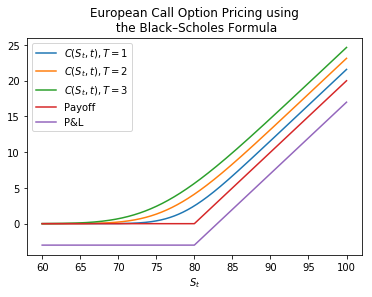

In [12]:
from scipy.stats import norm

# Call option
def CallOption(S_t, K, T, t, r, d_1, d_2):
    return S_t*norm.cdf(d_1) - K*np.exp(-r*(T-t))*norm.cdf(d_2)

# Parameters
S_t = np.linspace(60, 100, 1000)
K = 80
T = np.array([1, 2, 3])
t = 0
r = 0.02
sigma = 0.05
d_1 = np.array([(1/(sigma*np.sqrt(T[0]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[0]-t)), 
                (1/(sigma*np.sqrt(T[1]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[1]-t)),
                (1/(sigma*np.sqrt(T[2]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[2]-t))])
d_2 = np.array([d_1[0] - sigma*np.sqrt(T[0]-t), 
                d_1[1] - sigma*np.sqrt(T[1]-t),
                d_1[2] - sigma*np.sqrt(T[2]-t)])

plt.plot(S_t, CallOption(S_t, K, T[0], t, r, d_1[0], d_2[0]), label=r'$C(S_t, t), T = 1$')
plt.plot(S_t, CallOption(S_t, K, T[1], t, r, d_1[1], d_2[1]), label=r'$C(S_t, t), T = 2$')
plt.plot(S_t, CallOption(S_t, K, T[2], t, r, d_1[2], d_2[2]), label=r'$C(S_t, t), T = 3$')
plt.plot(S_t, LongCallPayoff, label='Payoff')
plt.plot(S_t, LongCallPandL, label='P&L')
plt.xlabel(r"$S_t$")
plt.title('European Call Option Pricing using\n the Black–Scholes Formula')
plt.legend()
plt.show()

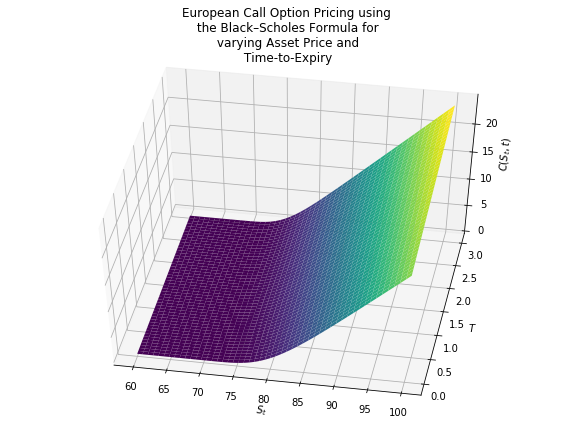

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# 3d plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

S_t = np.linspace(60, 100, 1000)
K = 80
T = np.linspace(0, 3, 1000)
t = 0
r = 0.02
d_1 = (1/(sigma*np.sqrt(T-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T-t))
d_2 = d_1 - sigma*np.sqrt(T-t)

S_t, T = np.meshgrid(S_t, T)

ax.plot_surface(S_t, T, CallOption(S_t, K, T, t, r, d_1, d_2), cmap='viridis')
np.seterr(divide='ignore')
ax.set_xlabel(r'$S_t$')
ax.set_ylabel(r'$T$')
ax.set_zlabel(r'$C(S_{t}, t)$')
ax.set_title('European Call Option Pricing using\n the Black–Scholes Formula for\n varying Asset Price and\n Time-to-Expiry', y=1.027)
ax.view_init(50,280)
plt.show()

the price of a corresponding **put option** is,

$$P(S_{t},t) = K \mathrm{e}^{-r(T-t)} N(-\mathrm{d}_2)-S_{t} N(-\mathrm{d}_1)$$

where similarly,

$\space \space \space \space {\begin{aligned}&N(x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]\\&\mathrm{d}_{1}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\log \left({\frac {S_{t}}{K}}\right)+\left(r+{\frac {\sigma ^{2}}{2}}\right)(T-t)\right]\\&\mathrm{d}_{2}=\mathrm{d}_{1}-\sigma {\sqrt {T-t}}\end{aligned}}$

<div class="alert alert-warning">
For,
<br>
$\space \space \space \space S_t \in [60, 100]$
<br>
$\space \space \space \space K = 80$
<br>
$\space \space \space \space T \in [0, 3]$
<br>
$\space \space \space \space t = 0$   
<br>
$\space \space \space \space r = 0.02$
<br>
$\space \space \space \space \sigma = 0.05$
</div>

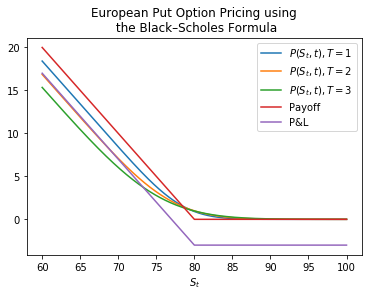

In [14]:
# Put option
def PutOption(S_t, K, T, t, r, d_1, d_2):
    return K*np.exp(-r*(T-t))*norm.cdf(-d_2) - S_t*norm.cdf(-d_1)

# Parameters
S_t = np.linspace(60, 100, 1000)
K = 80
T = np.array([1, 2, 3])
t = 0
r = 0.02
sigma = 0.05
d_1 = np.array([(1/(sigma*np.sqrt(T[0]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[0]-t)), 
                (1/(sigma*np.sqrt(T[1]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[1]-t)),
                (1/(sigma*np.sqrt(T[2]-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T[2]-t))])
d_2 = np.array([d_1[0] - sigma*np.sqrt(T[0]-t), 
                d_1[1] - sigma*np.sqrt(T[1]-t),
                d_1[2] - sigma*np.sqrt(T[2]-t)])

plt.plot(S_t, PutOption(S_t, K, T[0], t, r, d_1[0], d_2[0]), label=r'$P(S_t, t), T = 1$')
plt.plot(S_t, PutOption(S_t, K, T[1], t, r, d_1[1], d_2[1]), label=r'$P(S_t, t), T = 2$')
plt.plot(S_t, PutOption(S_t, K, T[2], t, r, d_1[2], d_2[2]), label=r'$P(S_t, t), T = 3$')
plt.plot(S_t, LongPutPayoff, label='Payoff')
plt.plot(S_t, LongPutPandL, label='P&L')
plt.xlabel(r"$S_t$")
plt.title('European Put Option Pricing using\n the Black–Scholes Formula')
plt.legend()
plt.show()

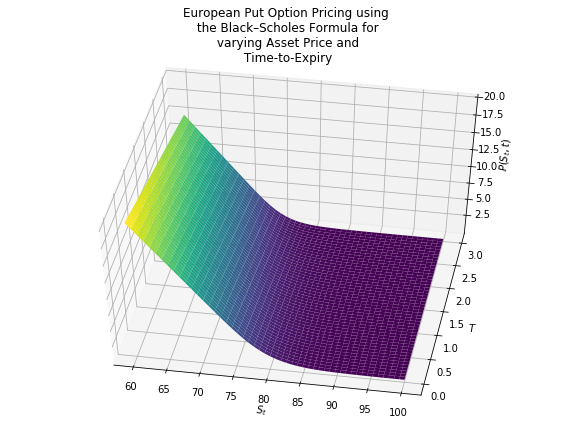

In [15]:
# 3d plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

S_t = np.linspace(60, 100, 1000)
K = 80
T = np.linspace(0, 3, 1000)
t = 0
r = 0.02
d_1 = (1/(sigma*np.sqrt(T-t)))*(np.log(S_t/K)+(r+((sigma**2)/2))*(T-t))
d_2 = d_1 - sigma*np.sqrt(T-t)

S_t, T = np.meshgrid(S_t, T)

ax.plot_surface(S_t, T, PutOption(S_t, K, T, t, r, d_1, d_2), cmap='viridis')
np.seterr(divide='ignore')
ax.set_xlabel(r'$S_t$')
ax.set_ylabel(r'$T$')
ax.set_zlabel(r'$P(S_{t}, t)$')
ax.set_title('European Put Option Pricing using\n the Black–Scholes Formula for\n varying Asset Price and\n Time-to-Expiry', y=1.027)
ax.view_init(50,280)
plt.show()

### Flaws in the Black-Scholes Model

The biggest flaws of the Blacks-Scholes option pricing model lie within its unrealistic assumptions which do not accurately reflect the properties of the market, and can be in some instances considered misleading.
<br>
**Volatility is not constant:** While volatility can be relatively constant in very short term periods, it is never constant in the long term.
<br>
**Interest rates are not constant:** In the real world, there is no such thing as a risk-free rate, but it is possible to use the U.S. Government Treasury Bills 30-day rate since the U. S. government is deemed to be credible enough. However, these treasury rates can change in times of increased volatility.
<br>
**Markets are not perfectly liquid:** As demonstrated by the events of 1987, 1998, 2007-2008, markets are indeed not perfectly liquid.
<br>
**Dividends:** The Black-Scholes assumption that the underlying stock does not pay dividends during the option's life does not apply in most cases since most public companies actually pay dividends to their shareholders.
<br>
**Price movements are not normally distributed:** As noted by Hull, experience has shown that returns are *leptokurtic*, i.e., have much more of a tendency to exhibit outliers than would be the case if they were normally  distributed.

## Bibliography

- **[1]** https://en.wikipedia.org/wiki/Option
<br>
- **[2]** https://en.wikipedia.org/wiki/Call_option
<br>
- **[3]** https://en.wikipedia.org/wiki/Put_option
<br>
- **[4]** https://en.wikipedia.org/wiki/Option_style
<br>
- **[5]** https://www.investopedia.com/terms/e/europeanoption.asp
<br>
- **[6]** https://www.investopedia.com/terms/a/americanoption.asp
<br>
- **[7]** https://en.wikipedia.org/wiki/Option
<br>
- **[8]** https://en.wikipedia.org/wiki/Option
<br>
- **[9]** https://en.wikipedia.org/wiki/Option
<br>
- **[10]** https://en.wikipedia.org/wiki/Option
<br>
- **[11]** https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model